# Logistic Regression with Scikit Learn - Machine Learning with Python


![](https://i.imgur.com/N8aIuRK.jpg)

## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll learn how to apply _logistic regression_ to a real-world dataset from [Kaggle](https://kaggle.com/datasets):

> **QUESTION**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
> 
> ![](https://i.imgur.com/5QNJvir.png)
>
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 
>
>
> ![](https://i.imgur.com/KWfcpcO.png)




## Linear Regression vs. Logistic Regression

In the [previous tutorial](https://jovian.ai/aakashns/python-sklearn-linear-regression), we attempted to predict a person's annual medical charges using _linear regression_. In this tutorial, we'll use _logistic regression_, which is better suited for _classification_ problems like predicting whether it will rain tomorrow. Identifying whether a given problem is a _classfication_ or _regression_ problem is an important first step in machine learning.


### Classification Problems


Problems where each input must be assigned a discrete category (also called label or class) are known as _classification problems_. 

Here are some examples of classification problems:

- [Rainfall prediction](https://kaggle.com/jsphyg/weather-dataset-rattle-package): Predicting whether it will rain tomorrow using today's weather data (classes are "Will Rain" and "Will Not Rain")
- [Breast cancer detection](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data): Predicting whether a tumor  is "benign" (noncancerous) or "malignant" (cancerous) using information like its radius, texture etc.
- [Loan Repayment Prediction](https://www.kaggle.com/c/home-credit-default-risk) - Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children etc.
- [Handwritten Digit Recognition](https://www.kaggle.com/c/digit-recognizer) - Identifying which digit from 0 to 9 a picture of handwritten text represents.

Can you think of some more classification problems?

> **EXERCISE**: Replicate the steps followed in this tutorial with each of the above datasets.


Classification problems can be binary (yes/no) or multiclass (picking one of many classes).


### Regression Problems

Problems where a continuous numeric value must be predicted for each input are known as _regression problems_.

Here are some example of regression problems:

- [Medical Charges Prediction](https://www.kaggle.com/subhakarks/medical-insurance-cost-analysis-and-prediction)
- [House Price Prediction](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) 
- [Ocean Temperature Prediction](https://www.kaggle.com/sohier/calcofi)
- [Weather Temperature Prediction](https://www.kaggle.com/budincsevity/szeged-weather)

Can you think of some more regression problems?

> **EXERCISE**: Replicate the steps followed in the [previous tutorial](https://jovian.ai/aakashns/python-sklearn-linear-regression) with each of the above datasets.


### Linear Regression for Solving Regression Problems

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">


For a mathematical discussion of linear regression, watch [this YouTube playlist](https://www.youtube.com/watch?v=kHwlB_j7Hkc&list=PLJs7lEb1U5pYnrI0Wn4mzPmppVqwERL_4&index=1)


### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.


### Machine Learning Workflow

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning ([image source](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)). 

<img src="https://i.imgur.com/1EMQmAw.png" width="480">


In this tutorial, we'll train a _logistic regression_ model using the Rain in Australia dataset to predict whether or not it will rain at a location tomorrow, using today's data. This is a _binary classification_ problem.

Let's install the `scikit-learn` library which we'll use to train our model.

#Step 1 - Download and Explore the Data

The dataset is available as a ZIP file at the following url:

In [1]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [6]:
import os
data_dir='/content/weather-dataset-rattle-package'
os.listdir(data_dir)

['weatherAUS.csv']

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
path= data_dir +"/weatherAUS.csv"

> **QUESTION 1**: Load the data from the file `train.csv` into a Pandas data frame.

In [11]:
weather=pd.read_csv(path)

In [12]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


The dataset contains over 145,000 rows and 23 columns. The dataset contains date, numeric and categorical columns. Our objective is to create a model to predict the value in the column `RainTomorrow`.

Let's explore the columns and data types within the dataset.

In [13]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

While we should be able to fill in missing values for most columns, it might be a good idea to discard the rows where the value of `RainTomorrow` or `RainToday` is missing to make our analysis and modeling simpler (since one of them is the target variable, and the other is likely to be very closely related to the target variable). 

In [17]:
weather.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

> **QUESTION 2**: How many rows and columns does the dataset contain? 

In [18]:
n_rows = weather.shape[0]

In [19]:
n_cols = weather.shape[1]

In [20]:
print('The dataset contains {} rows and {} columns.'.format(n_rows, n_cols))

The dataset contains 140787 rows and 23 columns.


> **(OPTIONAL) QUESTION**: Before training the model, you may want to explore and visualize data from the various columns within the dataset, and study their relations. Create some graphs and summarize your insights using the empty cells below.

* libraries that we are going to use in this collab 

In [22]:
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#The following settings will improve the default style and font sizes for our charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

> **QUESTION 3**: How many `missing values` does the dataset contain? 

In [27]:
# Here we will check the percentage of nan values present in each feature
# 1 -step make the list of features which has missing values
feature_with_na=[feature for feature in weather.columns if weather[feature].isnull().sum()>1]
# 2- step print the feature name and the percentage of missing values
for feature in feature_with_na:
  print(feature, np.round(weather[feature].isnull().mean(), 4)*100,  " % missing values")

MinTemp 0.33  % missing values
MaxTemp 0.22  % missing values
Evaporation 42.4  % missing values
Sunshine 47.449999999999996  % missing values
WindGustDir 6.510000000000001  % missing values
WindGustSpeed 6.47  % missing values
WindDir9am 6.859999999999999  % missing values
WindDir3pm 2.6100000000000003  % missing values
WindSpeed9am 0.75  % missing values
WindSpeed3pm 1.7999999999999998  % missing values
Humidity9am 1.08  % missing values
Humidity3pm 2.4899999999999998  % missing values
Pressure9am 9.76  % missing values
Pressure3pm 9.78  % missing values
Cloud9am 37.38  % missing values
Cloud3pm 39.839999999999996  % missing values
Temp9am 0.47000000000000003  % missing values
Temp3pm 1.8599999999999999  % missing values


## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:

In [45]:
px.histogram(weather, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [46]:
px.histogram(weather, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

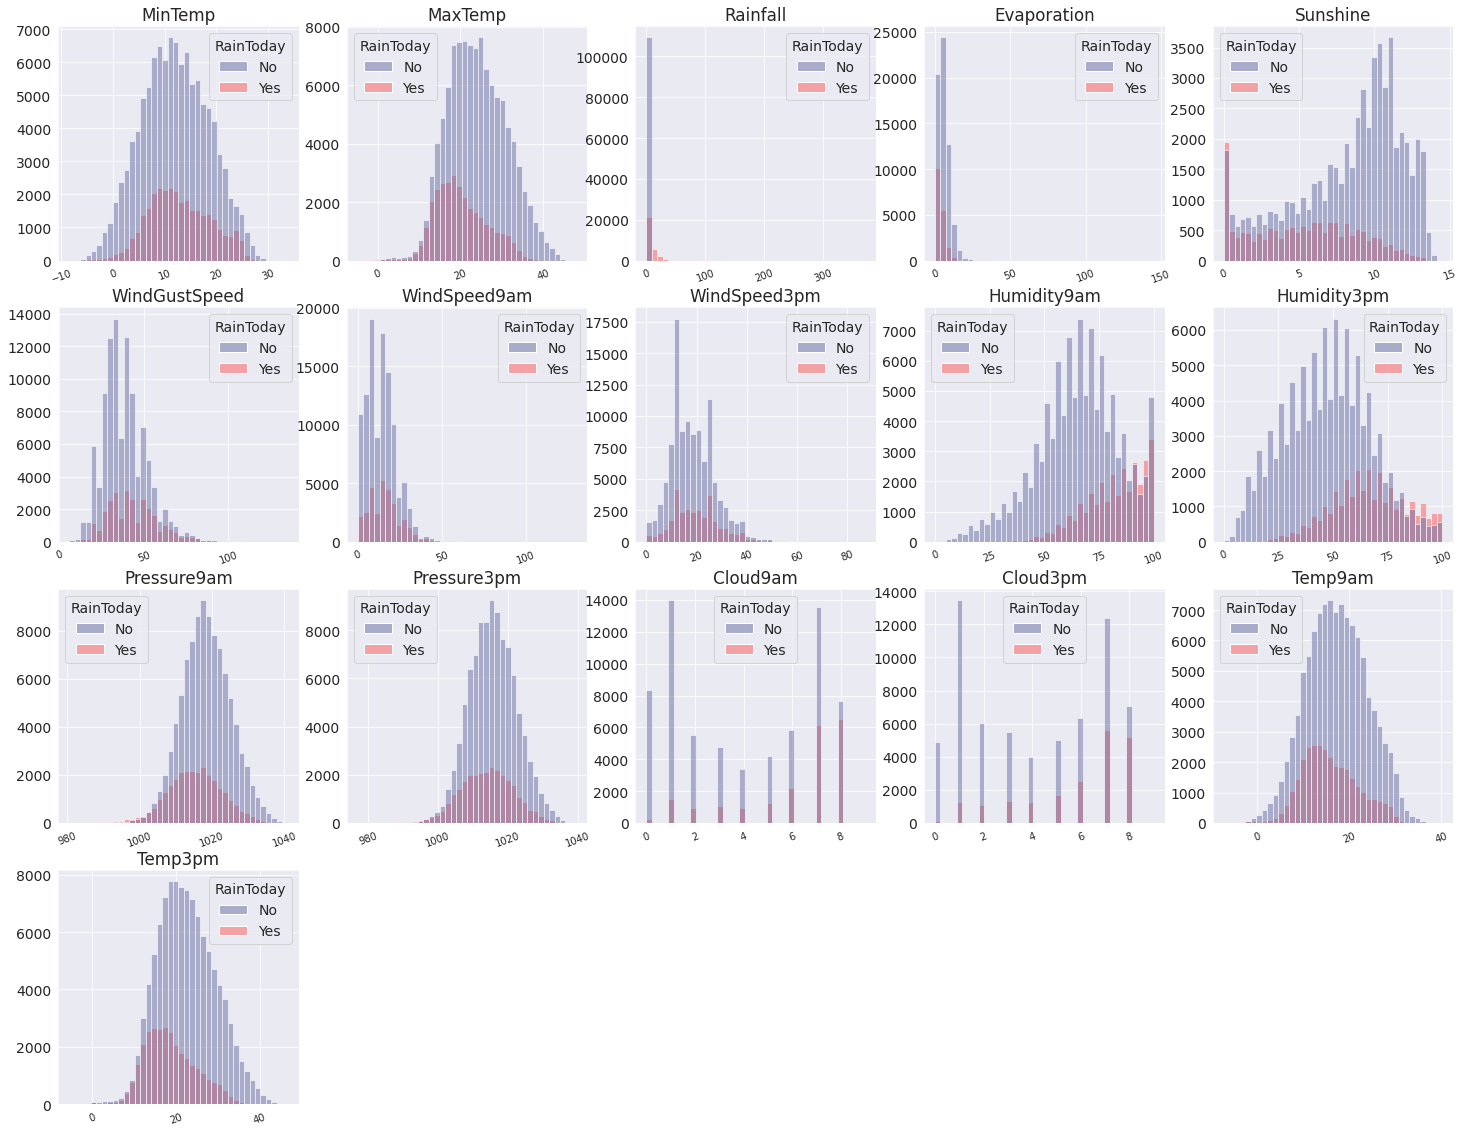

In [47]:
numerical = [feature for feature in weather.columns if weather[feature].dtype in ['int64', 'float64']]
data = weather[numerical]

fig = plt.figure(figsize = (25, 25))

i=1
for n in data.columns:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = weather[n],hue = weather['RainToday'], palette = ['#676FA3', '#FF5959'], bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

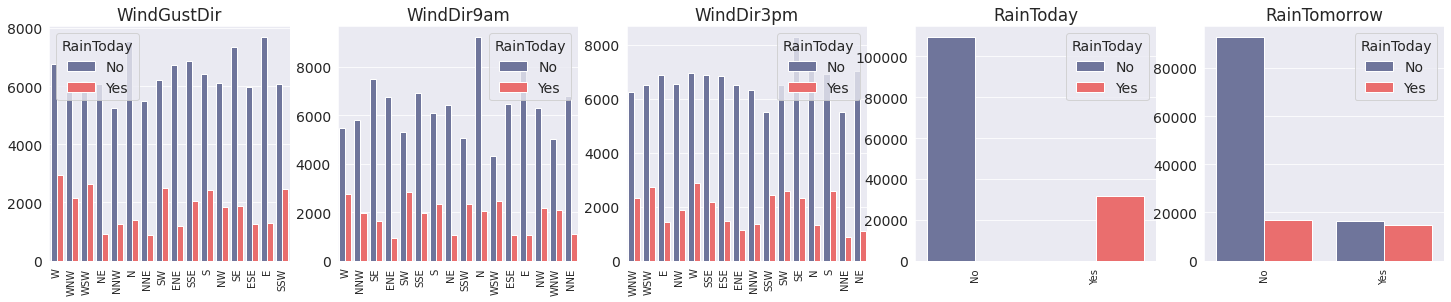

In [48]:
categorical = [feature for feature in weather.columns if weather[feature].nunique() < 25 and weather[feature].dtype == "object"]
data = weather[categorical]

plt.figure(figsize = (25, 25))

i = 1
for c in data.columns:
    plt.subplot(5, 5, i)
    ax = sns.countplot(data = data, x = weather[c], hue = 'RainToday', palette = ['#676FA3', '#FF5959'])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(c), loc='center')
    plt.xticks(rotation = 90, fontsize = 10)
    i += 1

# Step 2 - Prepare the Dataset for Training


Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the input and target column(s) for training the model.
2. Identify numeric and categorical input columns.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data into one-hot vectors.
6. Split the dataset into training and validation sets.


## Identify Inputs and Targets

While the dataset contains `81` columns, not all of them are useful for modeling. Note the following:

- The first column `Id` is a unique ID for each house and isn't useful for training the model.
- The last column `SalePrice` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the first and the last column) can be used as inputs to the model.
 

> **QUESTION 4**: Create a list `input_cols` of column names containing data that can be used as input to train the model, and identify the target column as the variable `target_col`.

In [49]:
# Identify the input columns (a list of column names)
input_cols = list(weather.columns)[1:-1]

In [50]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [52]:
# Identify the name of the target column (a single string, not a list)
target_col =list(weather.columns)[-1]

In [53]:
print(target_col)

RainTomorrow


Make sure that the `Id` and `SalePrice` columns are not included in `input_cols`.

Now that we've identified the input and target columns, we can separate input & target data.

In [55]:
inputs_df = weather[input_cols]
targets = weather[target_col]

##Identify Numeric and Categorical Data
The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

> **QUESTION 5**: Crate two lists `numeric_cols` and `categorical_cols` containing names of numeric and categorical input columns within the dataframe respectively. Numeric columns have data types `int64` and `float64`, whereas categorical columns have the data type `object`.
>
> *Hint*: See this [StackOverflow question](https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas). 

In [56]:
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = inputs_df.select_dtypes(include=[object]).columns.tolist()

##Impute Numerical Data
Some of the numeric columns in our dataset contain missing values (nan)

In [57]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Sunshine         66805
Evaporation      59694
Cloud3pm         56094
Cloud9am         52625
Pressure3pm      13769
Pressure9am      13743
WindGustSpeed     9105
Humidity3pm       3501
Temp3pm           2624
WindSpeed3pm      2531
Humidity9am       1517
WindSpeed9am      1055
Temp9am            656
MinTemp            468
MaxTemp            307
dtype: int64

Machine learning models can't work with missing data. The process of filling missing values is called [imputation](https://scikit-learn.org/stable/modules/impute.html).

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.


> **QUESTION 6**: Impute (fill) missing values in the numeric columns of `inputs_df` using a `SimpleImputer`. 

In [58]:
from sklearn.impute import SimpleImputer
# 1. Create the imputer
imputer = SimpleImputer(strategy = 'mean')

# 2. Fit the imputer to the numeric colums
imputer.fit(inputs_df[numeric_cols])

# 3. Transform and replace the numeric columns
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

After calling `fit`, the computed statistic for each column is stored in the `statistics_` property of `imputer`.

In [60]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

The missing values in the training, test and validation sets can now be filled in using the `transform` method of `imputer`.

##Scale Numerical Values
The numeric columns in our dataset have varying ranges.

In [61]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,-8.5,-4.8,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.5,977.1,0.0,0.0,-7.2,-5.4
max,33.9,48.1,371.0,145.0,14.5,135.0,130.0,87.0,100.0,100.0,1041.0,1039.6,9.0,9.0,40.2,46.7


A good practice is to [scale numeric features](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) to a small range of values e.g. $(0,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.


> **QUESTION 7**: Scale numeric values to the $(0, 1)$ range using `MinMaxScaler` from `sklearn.preprocessing`.

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler to the numeric columns
scaler.fit(inputs_df[numeric_cols])

# Transform and replace the numeric columns
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



After scaling, the ranges of all numeric columns should be (0, 1).

In [63]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


##Encode Categorical Columns
Our dataset contains several categorical columns, each with a different number of categories.

In [64]:
inputs_df[categorical_cols].nunique().sort_values(ascending=False)

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64



Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

> **QUESTION 8**: Encode categorical columns in the dataset as one-hot vectors using `OneHotEncoder` from `sklearn.preprocessing`. Add a new binary (0/1) column for each category

In [65]:
from sklearn.preprocessing import OneHotEncoder

# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# 2. Fit the encoder to the categorical colums
encoder.fit(inputs_df[categorical_cols])

# 3. Generate column names for each category
encoded_cols = list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



102

In [66]:
# 4. Transform and add new one-hot category columns
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



The new one-hot category columns should now be added to `inputs_df`.

##Training and Validation Set
Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [68]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols], 
                                                                        targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)


In [69]:
train_inputs

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
12652,0.275943,0.499055,0.000000,0.019310,0.544828,0.325581,0.200000,0.321839,0.64,0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92728,0.693396,0.650284,0.000000,0.037741,0.526244,0.139535,0.053846,0.218391,0.80,0.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1078,0.459906,0.563327,0.000000,0.037741,0.526244,0.170543,0.146154,0.149425,0.51,0.36,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
124330,0.436321,0.372401,0.022102,0.037741,0.526244,0.341085,0.230769,0.218391,0.73,0.68,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
25385,0.408019,0.345936,0.017790,0.037741,0.526244,0.124031,0.084615,0.103448,0.98,0.99,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114114,0.563679,0.559546,0.000000,0.037741,0.526244,0.325581,0.200000,0.344828,0.68,0.58,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
124103,0.275943,0.383743,0.024798,0.037741,0.526244,0.286822,0.115385,0.298851,0.72,0.75,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
107412,0.476415,0.536862,0.000000,0.037741,0.526244,0.240310,0.169231,0.252874,0.71,0.34,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
136480,0.676887,0.742911,0.000000,0.055172,0.855172,0.240310,0.200000,0.195402,0.44,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [73]:
train_targets

12652     Yes
92728      No
1078       No
124330     No
25385     Yes
         ... 
114114     No
124103    Yes
107412     No
136480     No
126230    Yes
Name: RainTomorrow, Length: 105590, dtype: object

In [71]:
val_inputs

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
121459,0.629717,0.563327,0.000000,0.064828,0.103448,0.209302,0.069231,0.103448,0.41,0.34,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32051,0.389151,0.453686,0.000000,0.011034,0.551724,0.286822,0.200000,0.195402,0.76,0.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
107700,0.650943,0.818526,0.000000,0.078621,0.882759,0.356589,0.146154,0.252874,0.21,0.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26526,0.398585,0.421550,0.000000,0.037741,0.526244,0.372093,0.169231,0.298851,0.47,0.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
109566,0.424528,0.364839,0.006469,0.020690,0.365517,0.263337,0.146154,0.103448,0.58,0.53,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74870,0.577830,0.731569,0.000000,0.037741,0.526244,0.224806,0.184615,0.172414,0.55,0.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
127981,0.563679,0.544423,0.000000,0.037741,0.526244,0.224806,0.015385,0.275862,0.76,0.59,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6181,0.412736,0.491493,0.000000,0.023448,0.703448,0.209302,0.015385,0.229885,0.45,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
72890,0.523585,0.612476,0.001078,0.048276,0.406897,0.372093,0.130769,0.298851,0.70,0.32,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [72]:
val_targets

121459     No
32051     Yes
107700     No
26526      No
109566     No
         ... 
74870      No
127981     No
6181       No
72890      No
116396     No
Name: RainTomorrow, Length: 35197, dtype: object

# Step 3 - Train a Linear Regression Model

 Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

> **QUESTION 9**: Create and train a linear regression model using the `Ridge` class from `sklearn.linear_model`.

In [74]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(solver='liblinear')

# Fit the model using inputs and targets
model.fit(train_inputs,train_targets)

LogisticRegression(solver='liblinear')

`model.fit` uses the following strategy for training the model (source):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

# Step 4 - Make Predictions and Evaluate Your Model

The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function.

> **QUESTION 10**: Generate predictions and compute the RMSE loss for the training and validation sets. 
> 
> *Hint*: Use the `mean_squared_error` with the argument `squared=False` to compute RMSE loss.

In [75]:
train_preds =model.predict(train_inputs)

In [76]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

We can output a probabilistic prediction using `predict_proba`.

In [116]:
train_probs = model.predict_proba(train_inputs)
train_probs

array([[0.95801371, 0.04198629],
       [0.84686622, 0.15313378],
       [0.96526636, 0.03473364],
       ...,
       [0.97834275, 0.02165725],
       [0.99233778, 0.00766222],
       [0.42736549, 0.57263451]])

The numbers above indicate the probabilities for the target classes "No" and "Yes".

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [91]:
from sklearn.metrics import accuracy_score
score_T=accuracy_score(train_targets, train_preds)
print('The accuracy score for the validation set is {}.'.format(score_T))

The accuracy score for the validation set is 0.8514347949616441.


The model achieves an accuracy of 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

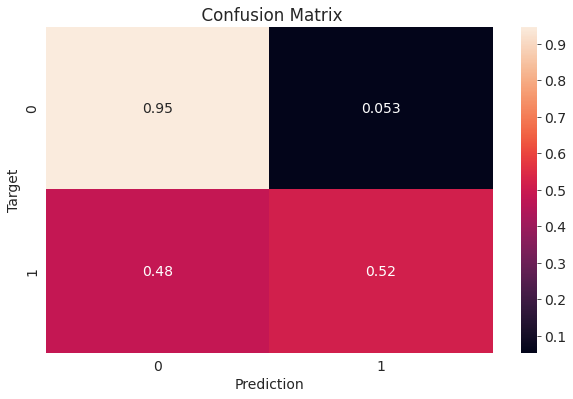

In [105]:
# Confussion Matricx
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(train_targets, train_preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title(' Confusion Matrix');

In [92]:
val_preds = model.predict(val_inputs)

In [93]:
val_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [94]:
score_V=accuracy_score(val_targets, val_preds)
print('The accuracy score for the validation set is {}.'.format(score_V))

The accuracy score for the validation set is 0.8474870017331022.


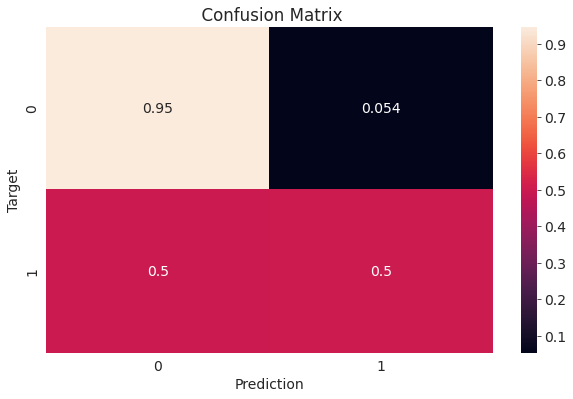

In [106]:
# Confussion Matricx
cf1=confusion_matrix(val_targets, val_preds, normalize='true')
plt.figure()
sns.heatmap(cf1, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title(' Confusion Matrix');

The accuracy of the model on the test and validation set are above 84%, which suggests that our model generalizes well to data it hasn't seen before. 

But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

## Feature Importance

Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

> **QUESTION 11**: Identify the weights (or coefficients) assigned to for different features by the model.
> 
> *Hint:* Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [100]:
weights = model.coef_.flatten()

Let's create a dataframe to view the weight assigned to each column.

In [81]:
weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [82]:
weights_df

,columns,weight
5,WindGustSpeed,6.754139
10,Pressure9am,6.160151
9,Humidity3pm,5.885855
2,Rainfall,2.993911
15,Temp3pm,1.422476
...,...,...
7,WindSpeed3pm,-1.425737
116,RainToday_No,-1.523978
4,Sunshine,-1.637192
1,MaxTemp,-2.579064


##Making Predictions
The model can be used to make predictions on new inputs using the following helper function:

In [107]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [109]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [110]:
predict_input(new_input)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



('Yes', 0.6363920246546244)

##Saving the model
Let's save the model (along with other useful objects) to disk, so that we use it for making predictions without retraining.

In [111]:
import joblib

In [112]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [113]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

The object can be loaded back using `joblib.load`

In [114]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

Let's use the loaded model to make predictions on the original test set.

In [115]:
test_preds2 = aussie_rain2['model'].predict(val_inputs)
accuracy_score(val_targets, test_preds2)

0.8474870017331022

As expected, we get the same result as the original model.